In [1]:
from FedAvg_2NN import *

mlp_iid1 = copy.deepcopy(mlp)
acc_mlp_iid1, predprob_2nn_iid1, ece_2nn_iid1, entropy_2nn_iid1, VR_2nn_iid1 = fedavg(mlp_iid1, C = 0.1, K = 100, E = 1, 
                      c_loader = iid_train_loader, rounds = 100, 
                      lr = 0.05, acc_threshold = acc_threshold_2nn)




In [3]:
print(len(acc_mlp_iid1))
print(len(acc_mlp_iid1[0]))

print(len(predprob_2nn_iid1))
print(len(predprob_2nn_iid1[0]))

print(len(ece_2nn_iid1))
print(ece_2nn_iid1)

print(len(entropy_2nn_iid1))
print(len(entropy_2nn_iid1[0]))

print(len(VR_2nn_iid1))
print(len(VR_2nn_iid1[0]))

96
20
96
20
96
[0.4727813967764377, 0.45071540627628565, 0.240565641887486, 0.16604559435546395, 0.11333979659080505, 0.09379277004152538, 0.07157333380132916, 0.06071309495590388, 0.05358302355408665, 0.04288247188478706, 0.045407947109639635, 0.03701961153596642, 0.03844372006952762, 0.03389232306629415, 0.029154533374309545, 0.030387079487741, 0.02778599302470684, 0.033014488136768314, 0.028016840296983737, 0.02663711128234865, 0.026667409548163427, 0.02365665124207738, 0.025193256132304602, 0.024054414483904836, 0.022113351711630792, 0.022042296639084785, 0.022270717930793788, 0.021026890251040452, 0.019206788370013203, 0.021421137061715105, 0.019226310822367657, 0.019832228624820675, 0.019864225232601194, 0.01876237386465066, 0.016693671505153107, 0.01865453125536442, 0.017853470790386187, 0.01776044399440292, 0.015257601058483143, 0.014555905950069383, 0.014538051204383378, 0.015385753975808568, 0.011182508942484907, 0.01305090576857327, 0.013800980168581028, 0.013301311120390888

In [4]:
import matplotlib.pyplot as plt
import statistics

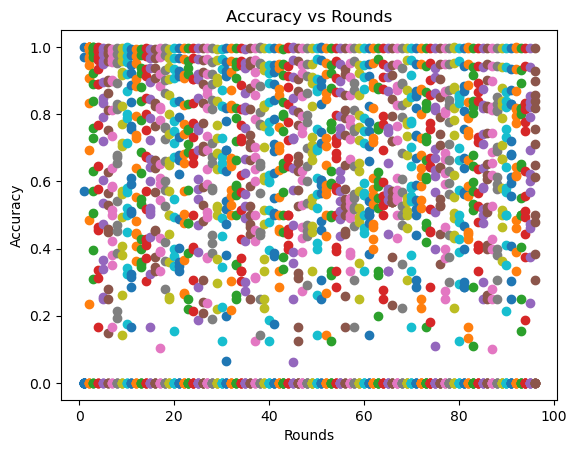

In [8]:
rounds = range(1, len(acc_mlp_iid1) + 1) 

for i, acc_list in enumerate(acc_mlp_iid1):
    plt.scatter([i + 1] * len(acc_list), acc_list)

plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Rounds")

plt.show()

In [9]:
print(acc_mlp_iid1[0])
print(acc_mlp_iid1[1])
print(acc_mlp_iid1[2])
print(acc_mlp_iid1[4])

[0, 0, 0.5705838081926674, 0.9708141321044547, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0.23558897243107768, 0.4860651865847898, 0.693354061406918, 0.8316569613552144, 0.9063706563706564, 0.9449838187702265, 0.9648711943793911, 0.9702127659574468, 1.0, 0.9915966386554622, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0]
[0, 0, 0.0, 0.3082706766917293, 0.39420289855072466, 0.5045871559633027, 0.5716019417475728, 0.6295955882352942, 0.7290448343079922, 0.7586649550706034, 0.838006230529595, 0.8898450946643718, 0.9237749546279492, 0.97131931166348, 0.9850249584026622, 0.9824281150159745, 0.9927927927927928, 0.997716894977169, 1.0, 1.0]
[0, 0, 0, 0.25, 0.2558139534883721, 0.36607142857142855, 0.3384615384615385, 0.4742268041237113, 0.5356125356125356, 0.6045081967213115, 0.7195767195767195, 0.7929203539823009, 0.8330434782608696, 0.8479020979020979, 0.8962108731466227, 0.9488817891373802, 0.9573901464713716, 0.9787234042553191, 0.9905865314989138, 0.9979296066252588]


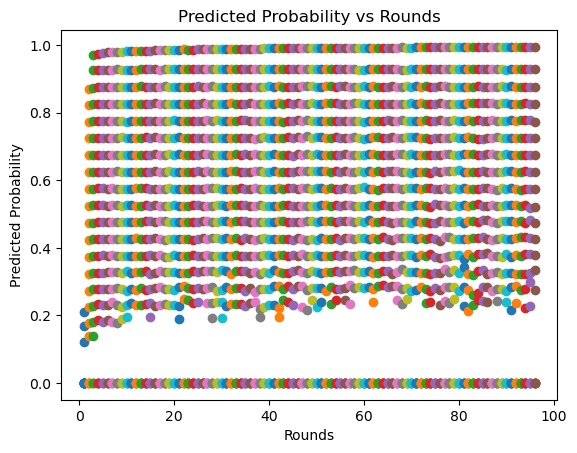

In [10]:
rounds = range(1, len(predprob_2nn_iid1) + 1) 

for i, predprob_list in enumerate(predprob_2nn_iid1):
    plt.scatter([i + 1] * len(predprob_list), predprob_list)

plt.xlabel("Rounds")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probability vs Rounds")

plt.show()

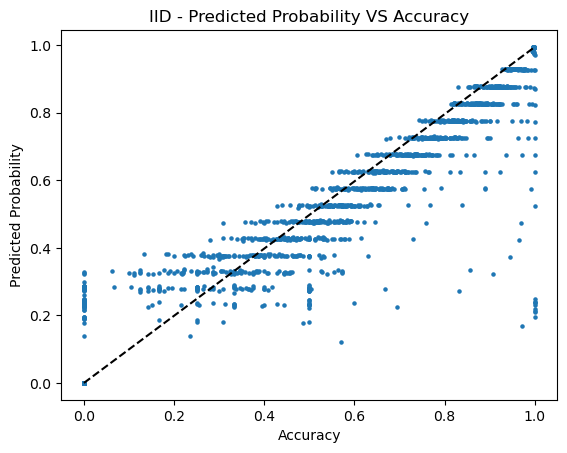

In [22]:
assert len(predprob_2nn_iid1) == len(acc_mlp_iid1), "Inconsistent list length"


x = []
y = []

for i in range(len(predprob_2nn_iid1)):
    assert len(predprob_2nn_iid1[i]) == len(acc_mlp_iid1[i]), "Inconsistent inner list length"
    y.extend(predprob_2nn_iid1[i])
    x.extend(acc_mlp_iid1[i])

plt.scatter(x, y, s = 5)

plt.plot([min(x), max(x)], [min(y), max(y)], color='black', linestyle='--')

plt.ylabel("Predicted Probability")
plt.xlabel("Accuracy")
plt.title("IID - Predicted Probability VS Accuracy")

plt.show()

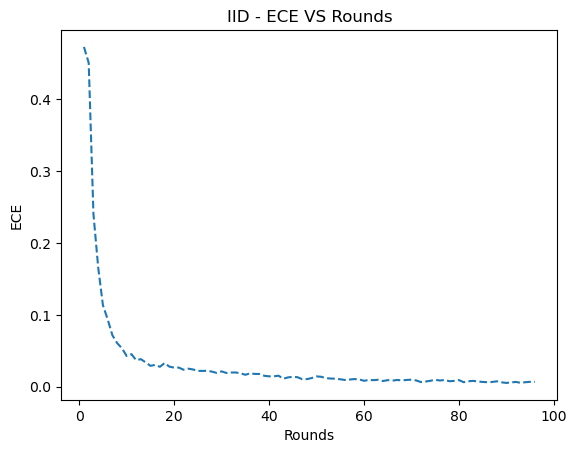

In [23]:
plt.plot(range(1, len(ece_2nn_iid1) + 1), ece_2nn_iid1, linestyle='--')
plt.ylabel("ECE")
plt.xlabel("Rounds")
plt.title("IID - ECE VS Rounds")

plt.show()

In [15]:
mlp_noniid1 = copy.deepcopy(mlp)
acc_mlp_noniid1, predprob_2nn_noniid1, ece_2nn_noniid1, entropy_2nn_noniid1, VR_2nn_noniid1 = fedavg(mlp_noniid1, C = 0.1, K = 100, E = 1, 
                      c_loader = noniid_train_loader, rounds = 600, 
                      lr = 0.05, acc_threshold = acc_threshold_2nn)

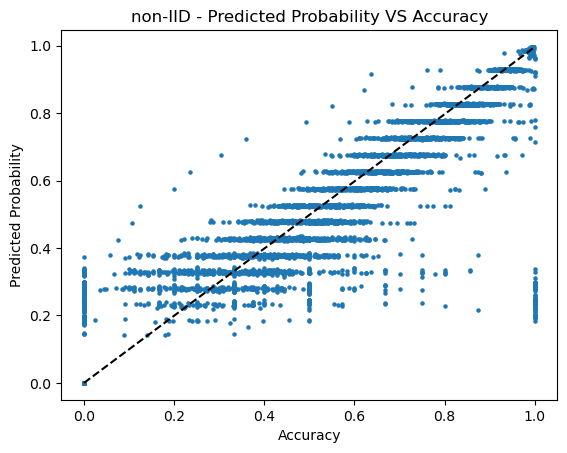

In [24]:
assert len(predprob_2nn_noniid1) == len(acc_mlp_noniid1), "Inconsistent list length"


x = []
y = []

for i in range(len(predprob_2nn_noniid1)):
    assert len(predprob_2nn_noniid1[i]) == len(acc_mlp_noniid1[i]), "Inconsistent inner list length"
    y.extend(predprob_2nn_noniid1[i])
    x.extend(acc_mlp_noniid1[i])

plt.scatter(x, y, s = 5)

plt.plot([min(x), max(x)], [min(y), max(y)], color='black', linestyle='--')

plt.ylabel("Predicted Probability")
plt.xlabel("Accuracy")
plt.title("non-IID - Predicted Probability VS Accuracy")

plt.show()

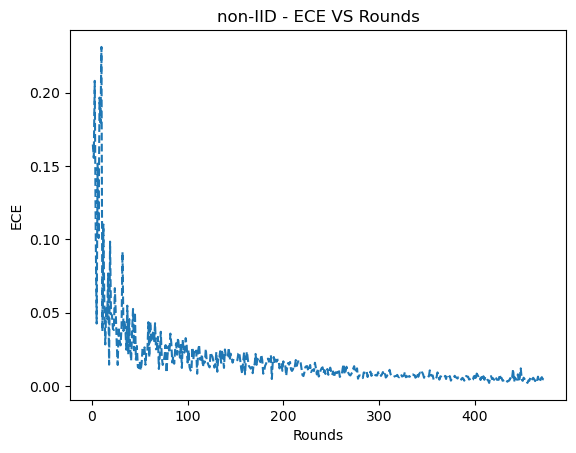

In [25]:
plt.plot(range(1, len(ece_2nn_noniid1) + 1), ece_2nn_noniid1, linestyle='--')
plt.ylabel("ECE")
plt.xlabel("Rounds")
plt.title("non-IID - ECE VS Rounds")

plt.show()